<a href="https://colab.research.google.com/github/mamon13303041/SalesAnalysis/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import os

Merge yearly salary into one csv file

In [ ]:
path = "/content/sample_data/sales"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
  
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
       
all_months_data.to_csv("all_data_copy.csv", index=False)
all_months_data.head()

Read Marged yearly sales data

In [77]:
df=pd.read_csv("/content/all_data_copy.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


Add extra column for order month

In [9]:
all_data = all_months_data[all_months_data['Order Date'].str[0:2]!='Or']


Data Cleaning

In [ ]:
df_cleaning=all_data[all_data.isna().any(axis=1)]
display(df_cleaning)
cleaned_data=all_data.dropna(how='any')
cleaned_data.head()

Add extra column for order month and Time

In [ ]:
from numpy import int32
cleaned_data['Month']=pd.to_datetime(cleaned_data['Order Date']).dt.month.astype(int32)
cleaned_data['Time']=pd.to_datetime(cleaned_data['Order Date']).dt.time
cleaned_data.head()

Getting seles by Order date and month

In [ ]:
cleaned_data.sort_values(by=['Order Date'], ascending=False, na_position='first').head()


Get Customer city from purchase adress column

In [ ]:

cleaned_data['Customer City'] = cleaned_data['Purchase Address'].apply(lambda x: x.split(",")[1].strip(""))
cleaned_data.head()


Addind Sells column

In [ ]:
from numpy import int32
from numpy import float64
cleaned_data['Sales'] = cleaned_data['Quantity Ordered'].astype(int32) * cleaned_data['Price Each'].astype(float64)
cleaned_data.head()

Data visulation!!!!

Retriving highest seles in a month

In [ ]:
cleaned_data['Quantity Ordered'] = pd.to_numeric(cleaned_data['Quantity Ordered'])
cleaned_data['Price Each'] = pd.to_numeric(cleaned_data['Price Each'])
hihest_df=cleaned_data.groupby(['Month']).sum()
hihest_df


What city sold the highest product?

In [ ]:
df_sold=cleaned_data.groupby(by=['Customer City']).sum()
df_sold


In [33]:
import matplotlib.pyplot as plt


range(1, 13)


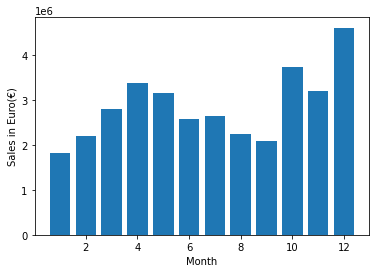

In [46]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,hihest_df['Sales'])

plt.ylabel('Sales in Euro(€)')
plt.xlabel('Month')
plt.show()

Retrive highest order by city

In [63]:
hihest_city_df=cleaned_data.groupby(['Customer City']).sum().sort_values(by=['Quantity Ordered'],ascending=False)
hihest_city_df

,Quantity Ordered,Price Each,Month,Sales
Customer City,,,,
San Francisco,50239,8211461.74,315520,8262203.91
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Atlanta,16602,2779908.20,104794,2795498.58
Seattle,16553,2733296.01,104941,2747755.48
Portland,14053,2307747.47,87765,2320490.61
Austin,11153,1809873.61,69829,1819581.75


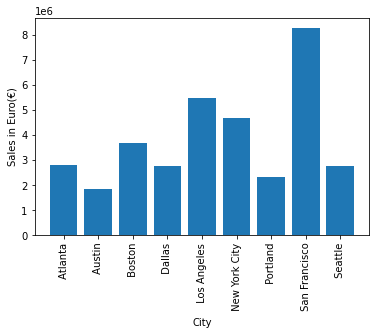

In [71]:
cites = [city for city, df in cleaned_data.groupby(['Customer City'])]

plt.bar(cites,cleaned_data.groupby(['Customer City']).sum()['Sales'])
plt.xticks(cites, rotation='vertical')
plt.ylabel('Sales in Euro(€)')
plt.xlabel('City')
plt.show()

What time the customers mostly like to buy products

In [ ]:
cleaned_data['Hour'] = pd.to_datetime(cleaned_data['Order Date']).dt.hour
cleaned_data['Minute'] = pd.to_datetime(cleaned_data['Order Date']).dt.minute

cleaned_data.head()

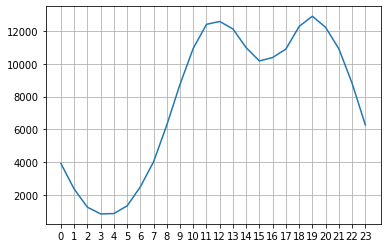

In [75]:
keys = [pair for pair, df in cleaned_data.groupby(['Hour'])]

plt.plot(keys, cleaned_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

Whats products the customers mostly orders together

In [94]:
cleaned_data['Grouped_id'] = cleaned_data.groupby(by='Order ID')['Product'].transform(lambda x: ','.join(x))
mostly_product_df = cleaned_data[['Order ID', 'Grouped_id']].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#--References https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in mostly_product_df['Grouped_id']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
 
    

for key,value in count.most_common():
    print(key, value)

Whats products the customers mostly orders

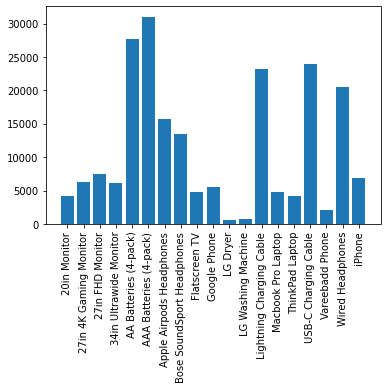

In [110]:
quantity_ordered = cleaned_data.groupby('Product').sum()['Quantity Ordered']

keys = [pair for pair, df in cleaned_data.groupby('Product')]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical')
plt.show()